## Проект: Анализ данных сервиса GoFast

Описание сервиса:

Сервис GoFast предоставляет возможность аренды электросамокатов через мобильное приложение. Существуют два типа пользователей:

Без подписки:
Абонентская плата отсутствует.
Стоимость минуты поездки - 8 рублей.
Стоимость старта - 50 рублей.

С подпиской Ultra:
Абонентская плата - 199 рублей в месяц.
Стоимость минуты поездки - 6 рублей.
Стоимость старта - бесплатно.

Цель проекта:

Проанализировать данные о пользователях GoFast из разных городов, включая информацию о их поездках. Цель исследования - проверить ряд гипотез, направленных на оптимизацию сервиса и его рост.

Задачи проекта:

Проанализировать поведение пользователей с разными типами подписки.
Определить факторы, влияющие на выбор пользователей между подпиской и оплатой по минутам.
Оценить влияние тарифов на активность пользователей (количество поездок, продолжительность поездок).
Изучить географические различия в поведении пользователей. 
Разработать рекомендации для GoFast по улучшению сервиса и привлечению новых пользователей.

----------------------

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.graph_objects as go
import numpy as np

#### Шаг 1. Загрузка данных

In [2]:
data_1 = pd.read_csv('/datasets/users_go.csv')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [3]:
data_1.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [4]:
data_1.head(15)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [5]:
data_2 = pd.read_csv('/datasets/rides_go.csv')
data_2.info

<bound method DataFrame.info of        user_id     distance   duration        date
0            1  4409.919140  25.599769  2021-01-01
1            1  2617.592153  15.816871  2021-01-18
2            1   754.159807   6.232113  2021-04-20
3            1  2694.783254  18.511000  2021-08-11
4            1  4028.687306  26.265803  2021-08-28
...        ...          ...        ...         ...
18063     1534  3781.098080  19.822962  2021-11-04
18064     1534  2840.423057  21.409799  2021-11-16
18065     1534  3826.185507  18.435051  2021-11-18
18066     1534  2902.308661  16.674362  2021-11-27
18067     1534  2371.711192  15.893917  2021-12-29

[18068 rows x 4 columns]>

In [6]:
data_2.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [7]:
data_2.head(15)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [8]:
data_3 = pd.read_csv('/datasets/subscriptions_go.csv')
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [9]:
data_3.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


In [10]:
data_3.head(15)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<font color='blue'>
Три датасета записаны в датафреймы с названиями data_1, data_2, data_3.
В первом датафрейме 1565 записей, 5 колонок с именами, возрастом, городом проживания, типом подписки и айди пользователей.
Во втором датафрейме 18068 записей, 4 колонки с айди, дистанцией, длительностью поездки и датами.
В третьем датафрейме 2 записи, 4 колонки с расценками поездки в зависимости от подписки.
Столбцы записаны в змеином регистре, данные в колонках соответствуют названию </font>

#### Шаг 2. Предобработка данных

In [11]:
data_2['duration'] = np.ceil(data_2['duration']).astype('int')
data_2['duration']

0        26
1        16
2         7
3        19
4        27
         ..
18063    20
18064    22
18065    19
18066    17
18067    16
Name: duration, Length: 18068, dtype: int64

In [12]:
data_1.duplicated().sum()

31

In [13]:
data_1 = data_1.drop_duplicates()
data_1.duplicated().sum()

0

In [14]:
data_2.duplicated().sum()

0

In [15]:
data_3.duplicated().sum()

0

In [16]:
data_1.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [17]:
data_2.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [18]:
data_3.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [19]:
data_2['date'] = pd.to_datetime(data_2['date'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
data_2['month'] = data_2['date'].dt.month.astype('int32')
data_2

,user_id,distance,duration,date,month
0,1,4409.919140,26,2021-01-01,1
1,1,2617.592153,16,2021-01-18,1
2,1,754.159807,7,2021-04-20,4
3,1,2694.783254,19,2021-08-11,8
4,1,4028.687306,27,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,20,2021-11-04,11
18064,1534,2840.423057,22,2021-11-16,11
18065,1534,3826.185507,19,2021-11-18,11
18066,1534,2902.308661,17,2021-11-27,11


In [21]:
data_2.sort_values(by='date', ascending=False)

,user_id,distance,duration,date,month
2576,272,4141.347535,29,2021-12-30,12
3278,353,1133.292906,16,2021-12-30,12
11752,1083,2952.365209,20,2021-12-30,12
15704,1369,2879.604810,19,2021-12-30,12
14115,1252,325.677862,10,2021-12-30,12
...,...,...,...,...,...
2754,294,3213.683882,24,2021-01-01,1
13591,1217,4756.419155,20,2021-01-01,1
2888,308,2560.959421,19,2021-01-01,1
13356,1202,2450.804058,18,2021-01-01,1


Имеются данные по поездкам с 1 января 2021 по 30 декабря 2021

<font color='blue'>
В первом датафрейме удалены явные дубликаты в количестве 31, в остальных датафреймах явных дубликатов не обнаружено.
Пропущеные значения также не обнаружены.
Добавлен новый столбец с месяцем поездки, дата переведена в удобный формат. </font>

#### Шаг 3. Исследовательский анализ данных

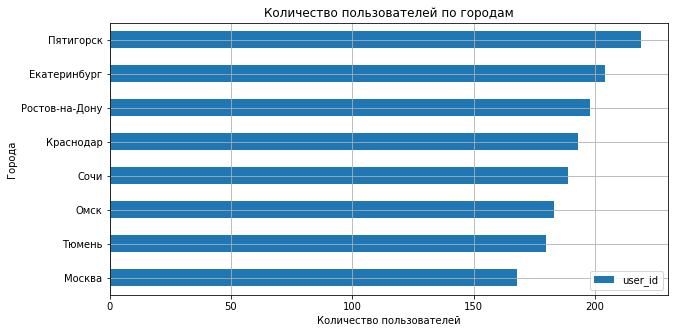

In [22]:
data_1.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True).plot(kind='barh', grid=True, figsize=(10, 5))

plt.title('Количество пользователей по городам')
plt.ylabel('Города')
plt.xlabel('Количество пользователей')

plt.show()


In [23]:
data_1['city'].value_counts(ascending=False)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Города расположены по убыванию числа пользователей, наибольшей популярностью сервис кикшеринга пользуется в Пятигорске, наименьшей-в Москве. 

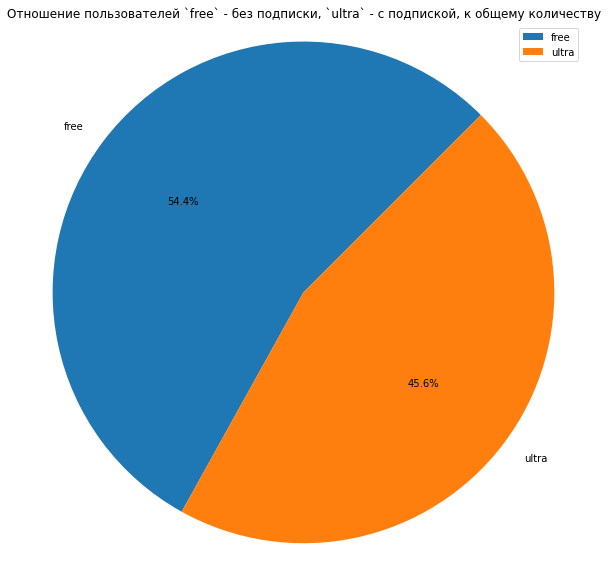

In [24]:
data_1.pivot_table(index='subscription_type', values='user_id', aggfunc='count').plot.pie(y='user_id', figsize=(10,10), startangle=45, autopct='%1.1f%%', label = '' ,  title='Отношение пользователей `free` - без подписки, `ultra` - с подпиской, к общему количеству')
plt.axis('equal')
plt.show()

Соотношение пользователей с бесплатной и платной подписками практически равно, однако первых немного больше

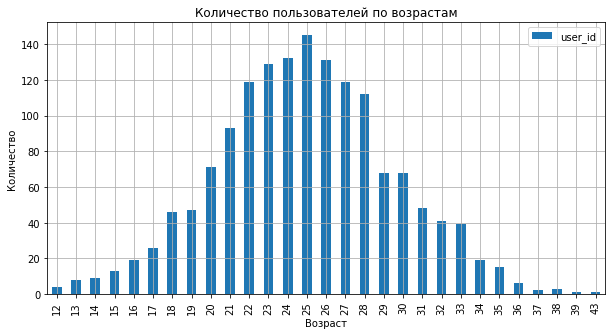

In [25]:
data_1.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True).plot(kind='bar' , grid=True, figsize=(10, 5))
plt.title('Количество пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [26]:
data_1['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Визуализация распределения пользователей по возрасту показывает нормальное распределение с центром около 25 лет. Среднее значение и медиана практически совпадают, что указывает на симметричность распределения.

In [27]:
data_2['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

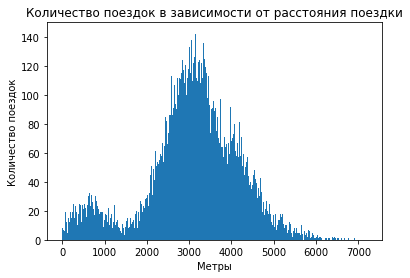

In [28]:
plt.hist(data_2['distance'], bins=500, range=(1,7200))
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Метры')
plt.ylabel('Количество поездок')
plt.show()

Визуализация распределения расстояний поездок демонстрирует схожесть с нормальным распределением, пик которого расположен несколько выше 3 км. 

Среднее значение и медиана практически совпадают, что подтверждает симметричность распределения. 

Медиана расположена на 3133 метрах, первый квартиль - на 2543 метрах, а третий квартиль - на 3776 метрах.

In [29]:
data_2['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

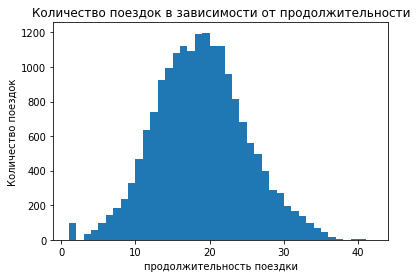

In [30]:
plt.hist(data_2['duration'], bins=41, range=(1,42))
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

Медиана продолжительности поездки чуть меньше 18 минут, она почти равна среднему значению. График опять же напоминает график нормального распределения. До примерно 18 минут наблюдается увеличение количества поездок, после 18-снижение.

<font color='blue'>
География:
Южные города пользуются сервисом активнее всего, вероятно, благодаря более продолжительному сезону проката.
Екатеринбург занимает второе место по популярности, что неожиданно, учитывая климат Урала.

Типы пользователей:
Пользователи без подписки (Free) составляют 54,4% от общего количества, что значительно больше, чем пользователей с подпиской Ultra (45,6%).

Возраст пользователей:
Средний возраст пользователей сервиса составляет около 25 лет, распределение по возрасту напоминает нормальное.

Расстояния поездок:
Медиана расстояния поездок составляет 3133 метра. 
Первый и третий квартили - 2543 и 3776 метров соответственно.
Гистограмма показывает нормальное распределение, но с заметным вторым пиком около 700 метров, который, хотя и не входит в основное распределение, требует внимания.

Продолжительность поездок:

Медиана длительности - 18 минут, первый и третий квартили - 14 и 22 минуты.
Гистограмма выявляет аномальные значения продолжительности поездок менее 1 минуты. 

</font>

#### Шаг 4. Объединение данных

In [31]:
df = pd.merge(data_1, data_3, on='subscription_type')
df = pd.merge(data_2, df, on='user_id')
df

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,20,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,22,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,19,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,17,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  int64         
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int32         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(3)
memory usage: 1.7+ MB


In [33]:
ultra = df[df['subscription_type'] == 'ultra']

In [34]:
free = df[df['subscription_type'] == 'free']

In [35]:
ultra.describe()

,user_id,distance,duration,month,age,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,3115.445388,19.037692,6.422308,24.892615,6.0,0.0,199.0
std,201.099339,836.895330,5.577439,3.414616,4.757208,0.0,0.0,0.0
min,1.000000,244.210438,4.000000,1.000000,12.000000,6.0,0.0,199.0
25%,175.000000,2785.444017,15.000000,4.000000,22.000000,6.0,0.0,199.0
50%,351.000000,3148.637229,19.000000,6.000000,25.000000,6.0,0.0,199.0
75%,525.000000,3560.574425,22.000000,9.000000,28.000000,6.0,0.0,199.0
max,699.000000,5699.769662,41.000000,12.000000,38.000000,6.0,0.0,199.0


In [36]:
free.describe()

,user_id,distance,duration,month,age,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,3045.495282,17.890992,6.522994,24.893326,8.0,50.0,0.0
std,241.165628,1246.173806,6.330250,3.449770,4.481100,0.0,0.0,0.0
min,700.000000,0.855683,1.000000,1.000000,12.000000,8.0,50.0,0.0
25%,915.000000,2366.562689,13.000000,4.000000,22.000000,8.0,50.0,0.0
50%,1123.000000,3114.648465,18.000000,7.000000,25.000000,8.0,50.0,0.0
75%,1328.000000,3905.697894,22.000000,9.000000,28.000000,8.0,50.0,0.0
max,1534.000000,7211.007745,35.000000,12.000000,43.000000,8.0,50.0,0.0


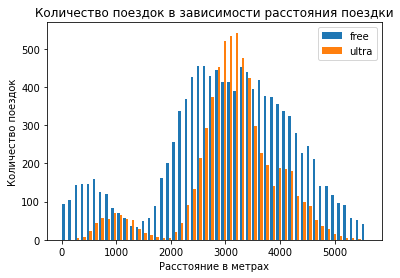

In [37]:
plt.hist([free['distance'], ultra['distance']], bins=50, range=(1,5600), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

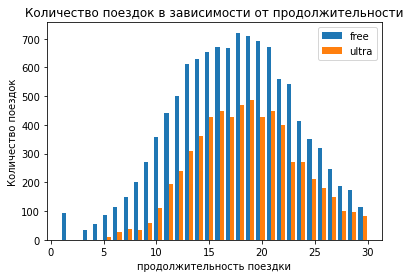

In [38]:
plt.hist([free['duration'], ultra['duration']], bins=30, range=(1,30), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

Пользователи с подпиской делают более длительные поездки, в то время как пользователи без подписки делают более длинные по расстоянию поездки.
Очевидно увеличение количества пользователей прямо пропорционально с увеличением времени и расстояния.
Наблюдаются аномалии в датасете с бесплатными подписками. Уберем эти выбросы, хоть это можно было сделать и раньше. 

<font color='blue'>
Анализ данных о поездках пользователей GoFast, разделенных по типу подписки (free и ultra), показал влияние подписки на некоторые ключевые показатели:

Расстояние поездок:

Медиана: пользователи с подпиской ultra совершают поездки на чуть большее среднее расстояние (3148.64 метра), чем пользователи free (3114.65 метра).
Разброс: поездки пользователей с подпиской ultra демонстрируют меньший разброс по расстоянию, чем поездки пользователей free (стандартное отклонение: 836.89 vs 1246.17). 
Пик распределения: дополнительный пик на графике распределения расстояний у пользователей free находится в районе 500 метров, в то время как у пользователей ultra он смещен к 1000 метрам. 

Время поездок:

Медиана: пользователи с подпиской ultra в среднем проводят больше времени в поездках (19 минут), чем пользователи free (18 минут). 
Разброс: время поездок пользователей с подпиской ultra отличается меньшим разбросом (стандартное отклонение: 5.57), чем время поездок пользователей free (6.33).

Вывод:

Подписка Ultra оказывает влияние на расстояние и время поездок. Пользователи с подпиской отличаются более продолжительными поездками на чуть большее расстояние, при этом их поездки характеризуются меньшим разбросом по времени и расстоянию.
</font>

#### Шаг 5. Подсчёт выручки

In [40]:
df_total = (df.pivot_table(index=['user_id','month'], values=['city', 'subscription_type', 'distance', 'duration', 'date','minute_price', 'start_ride_price', 'subscription_fee'],
aggfunc={'city': 'first','subscription_type': 'first','distance': 'sum', 'duration': 'sum','date': 'count','minute_price': 'first','start_ride_price': 'first','start_ride_price': 'first','subscription_fee': 'first'}, fill_value=0))
df_total.head(15)


city  date      distance  duration  minute_price  \
user_id month                                                       
1       1      Тюмень     2   7027.511294        42             6   
        4      Тюмень     1    754.159807         7             6   
        8      Тюмень     2   6723.470560        46             6   
        10     Тюмень     2   5809.911100        32             6   
        11     Тюмень     3   7003.499363        56             6   
        12     Тюмень     2   6751.629942        28             6   
2       3        Омск     3  10187.723006        63             6   
        4        Омск     2   6164.381824        40             6   
        6        Омск     1   3255.338202        14             6   
        7        Омск     2   6780.722964        48             6   
        8        Омск     1    923.007439         7             6   
        10       Омск     1   2824.636598        19             6   
        12       Омск     1   3828.248580        12             6   
3       1      Москва     1   3061.777147        13             6   
        2      Москва     2   5421.152016        39             6   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra  
        12                    0               199             ultra  
2       3                     0               199             ultra  
        4                     0               199             ultra  
        6                     0               199             ultra  
        7                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        12                    0               199             ultra  
3       1                     0               199             ultra  
        2                     0               199             ultra

In [41]:
df_total['month_income']= ((df_total['minute_price'] * df_total['duration']) + (df_total['date'] * df_total['start_ride_price']) +  df_total['subscription_fee']).round(2)
df_total.head(50)

city  date      distance  duration  minute_price  \
user_id month                                                               
1       1              Тюмень     2   7027.511294        42             6   
        4              Тюмень     1    754.159807         7             6   
        8              Тюмень     2   6723.470560        46             6   
        10             Тюмень     2   5809.911100        32             6   
        11             Тюмень     3   7003.499363        56             6   
        12             Тюмень     2   6751.629942        28             6   
2       3                Омск     3  10187.723006        63             6   
        4                Омск     2   6164.381824        40             6   
        6                Омск     1   3255.338202        14             6   
        7                Омск     2   6780.722964        48             6   
        8                Омск     1    923.007439         7             6   
        10               Омск     1   2824.636598        19             6   
        12               Омск     1   3828.248580        12             6   
3       1              Москва     1   3061.777147        13             6   
        2              Москва     2   5421.152016        39             6   
        4              Москва     1   2956.651632        21             6   
        5              Москва     3   9064.026918        63             6   
        7              Москва     3  10919.595403        67             6   
        9              Москва     1   2891.012822        23             6   
        12             Москва     1   2593.381928        13             6   
4       2      Ростов-на-Дону     2   6339.696747        49             6   
        6      Ростов-на-Дону     2   6753.041806        45             6   
        7      Ростов-на-Дону     3  10491.175555        56             6   
        8      Ростов-на-Дону     1   4649.488243        36             6   
        10     Ростов-на-Дону     4  13260.762274        79             6   
        11     Ростов-на-Дону     2   3343.025291        28             6   
5       1                Омск     1   3914.646990        13             6   
        2                Омск     1   2561.108241        12             6   
        3                Омск     3  10633.732186        57             6   
        4                Омск     1   3373.080412        15             6   
        5                Омск     2   5823.074031        33             6   
        7                Омск     1   3311.974724        12             6   
        8                Омск     1   2720.817111        18             6   
        10               Омск     1   3218.515955        20             6   
6       2           Краснодар     1   3961.432708        28             6   
        5           Краснодар     3  11013.574364        72             6   
        8           Краснодар     1   3142.271823        17             6   
        9           Краснодар     1   3346.098372        20             6   
        10          Краснодар     1   2350.641957        11             6   
        11          Краснодар     1   3339.625640        17             6   
        12          Краснодар     2   6924.961829        44             6   
7       1                Омск     2   6478.080979        28             6   
        3                Омск     1   3679.561009        21             6   
        4                Омск     2   4888.946162        38             6   
        5                Омск     1   2971.564811        15             6   
        6                Омск     1   2508.554171        19             6   
        7                Омск     2   6097.825669        35             6   
        8                Омск     1   3008.257505        15             6   
        11               Омск     4  12879.354733        67             6   
        12               Омск     2   6195.334108        30             6   

               start

In [42]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               11331 non-null  object 
 1   date               11331 non-null  int64  
 2   distance           11331 non-null  float64
 3   duration           11331 non-null  int64  
 4   minute_price       11331 non-null  int64  
 5   start_ride_price   11331 non-null  int64  
 6   subscription_fee   11331 non-null  int64  
 7   subscription_type  11331 non-null  object 
 8   month_income       11331 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 842.1+ KB


In [43]:
df_total['month_income'].sum()

3878641



В итоговом датасете получилась 11331 запись, 9 столбцов, посчитана выручка сервиса кикшеринга благодаря созданию сводной таблице по айди и месяцам, получена сумма длительностей поездок по месяцам и расстояние, соответственно.
Распределение выручки выглядит достаточно нелогично: даже в зимние месяцы она достаточно высокая, может сравниться с выручкой за июнь-август.
    
</font>

#### Шаг 6. Проверка гипотез

Нулевая гипотеза:
Длительность поездок у пользователей с подпиской и без одинакова.

Альтернативная гипотеза:

Длительность поездок у  пользователей с подпиской больше.

In [44]:
alpha = 0.05 
results = st.ttest_ind(ultra['duration'], free['duration'], alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Поездки пользователей с подпиской дольше, чем поездки у пользователей без подписки.

Нулевая гипотеза:
В среднем distance у людей с подпиской равно 3130

Альтернативная гипотеза:
В среднем distance > 3130

In [45]:
avg = 3130

alpha = 0.05 

results = st.ttest_1samp(ultra['distance'], avg, alternative='greater')

print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-value: 0.9195368847849785
Не отвергаем нулевую гипотезу


Нулевая гипотеза не отвергается, пользователи с подпиской проезжают в среднем 3130 метров.

Нулевая гипотеза:
Выручка от обеих категорий пользователей одинакова

Альтернативная гипотеза:
Выручка от платных подписчиков больше

In [46]:
results = st.ttest_ind(df_total[df_total['subscription_type'] == 'ultra']['month_income'], df_total[df_total['subscription_type'] == 'free']['month_income'], alternative = 'greater')
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Статистический анализ показал, что средняя месячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Этот вывод подтвержден с уровнем значимости 5%, что позволяет отвергнуть гипотезу о равенстве средней выручки.

Теоретическая гипотеза

Проверка гипотезы о снижении обращений в техподдержку:

Для проверки гипотезы о том, что обновление серверов привело к снижению количества обращений в техподдержку, необходимо использовать парный t-тест для зависимых выборок (в Python – scipy.stats.ttest_rel()). 
Тест должен быть левосторонним, так как нас интересует снижение количества обращений.
Для проведения теста требуется информация о количестве обращений до и после обновления серверов для каждого пользователя.


<font color='blue'> 
Описание этапов исследования:

1. Загрузка данных:
    Проанализированы три датасета: data_1, data_2 и data_3.
    Выявлены и устранены дубликаты в data_1.
    Проверены типы данных, которые были скорректированы для корректной обработки.
    Данные признаны полными и достаточными для исследования.

2. Предобработка данных:
    В датасете data_1:
    Удалены дубликаты.
    Округлены значения продолжительности поездки duration до целых чисел.
    Преобразована дата date в формат datetime64.
    Создан столбец month с номером месяца из date.
    В датасете data_3 изменений не проводилось.

3. Исследовательский анализ данных:

Географическое распределение:
    Сервис GoFast пользуется большей популярностью в южных городах, где сезон проката продолжительнее.
    Екатеринбург занял второе место по количеству пользователей.

Пользователи с подпиской:
    Количество пользователей без подписки (free) (54,4%) превышает количество пользователей с подпиской (ultra) (45,6%).

Демография:
    Средний возраст пользователей приближен к 25 годам (медиана и среднее значение практически совпадают). 

Расстояние поездок:
    Медианное расстояние поездок - 3133 метра.
    Распределение расстояний имеет два пика: один в районе 700 метров, другой - около 3133 метров.

Продолжительность поездок:
    Медианная продолжительность поездок - 18 минут.
    Обнаружены аномалии в продолжительности поездок (время менее 1 минуты) и аномальные значения средней скорости перемещения
    (4000-7211 м/мин).

4. Объединение данных:

    Влияние подписки на расстояние:
    Медианное расстояние поездок для пользователей с подпиской ultra несколько больше, чем для пользователей free.
    Разброс расстояний у пользователей с подпиской ultra меньше.
    Пик распределения расстояний у пользователей free смещен к 500 метрам, а у пользователей ultra - к 1000 метрам.

    Влияние подписки на время:
    Медианное время поездок для пользователей с подпиской ultra больше, чем для пользователей free.
    Разброс времени поездок у пользователей с подпиской ultra меньше.

Выводы:

Подписка ultra влияет на расстояние и продолжительность поездок.
Пользователи с подпиской ultra совершают более продолжительные поездки на чуть большее расстояние, при этом их поездки отличаются меньшим разбросом.
Обнаружены аномалии в данных о продолжительности поездок и скорости движения.
Необходимо провести дополнительные исследования для выяснения причин обнаруженных аномалий.
    
</font>